<a href="https://colab.research.google.com/github/SidharthBhakth/Time-Series-Forecasting-with-TF2.x/blob/master/2_Simple_RNN_in_TF_2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple RNN in TF 2.x

Forecast a noisy sin wave with a simple Recurrent Neural Network using 10 lagged observations.


In [0]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

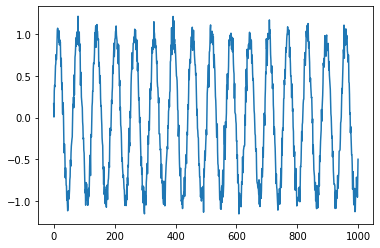

In [2]:
# Create a noisy sin wave
series = np.sin(0.1*np.arange(1000)) + (np.random.randn(1000)*0.1)

plt.plot(series)
plt.show()

In [3]:
# Build dataset to use 10 lagged observations to predict the next observation

X, y = [], []

T = 10 # number of timesteps

for t in range(len(series)-T):
  X.append(series[t:t+T])
  y.append(series[t+T])

X = np.array(X).reshape(-1, T, 1) # N x T x D dimensions
y = np.array(y)

X.reshape

# No of samples
N = len(X)

print(X.shape, y.shape)

(990, 10, 1) (990,)


In [0]:
# Build model
i = Input(shape=(T,1))
x = SimpleRNN(20, activation='relu')(i)
x = Dense(1)(x)

model = Model(i, x)

# Compile
model.compile(optimizer=Adam(lr=0.001), loss='mse')

In [5]:
# Train the model
r = model.fit(X[:-N//2], y[:-N//2], validation_data=(X[-N//2:], y[-N//2:]), epochs=80, verbose=2)

Epoch 1/80
16/16 - 0s - loss: 0.2339 - val_loss: 0.1443
Epoch 2/80
16/16 - 0s - loss: 0.0937 - val_loss: 0.0484
Epoch 3/80
16/16 - 0s - loss: 0.0326 - val_loss: 0.0259
Epoch 4/80
16/16 - 0s - loss: 0.0219 - val_loss: 0.0199
Epoch 5/80
16/16 - 0s - loss: 0.0176 - val_loss: 0.0176
Epoch 6/80
16/16 - 0s - loss: 0.0160 - val_loss: 0.0163
Epoch 7/80
16/16 - 0s - loss: 0.0151 - val_loss: 0.0160
Epoch 8/80
16/16 - 0s - loss: 0.0147 - val_loss: 0.0161
Epoch 9/80
16/16 - 0s - loss: 0.0143 - val_loss: 0.0160
Epoch 10/80
16/16 - 0s - loss: 0.0146 - val_loss: 0.0157
Epoch 11/80
16/16 - 0s - loss: 0.0140 - val_loss: 0.0157
Epoch 12/80
16/16 - 0s - loss: 0.0144 - val_loss: 0.0154
Epoch 13/80
16/16 - 0s - loss: 0.0145 - val_loss: 0.0155
Epoch 14/80
16/16 - 0s - loss: 0.0145 - val_loss: 0.0166
Epoch 15/80
16/16 - 0s - loss: 0.0148 - val_loss: 0.0159
Epoch 16/80
16/16 - 0s - loss: 0.0142 - val_loss: 0.0154
Epoch 17/80
16/16 - 0s - loss: 0.0138 - val_loss: 0.0155
Epoch 18/80
16/16 - 0s - loss: 0.0138 - 

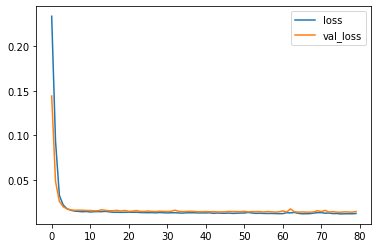

In [6]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [0]:
# Forecast future predictions using self-predictions
y_test = y[-N//2:]
y_pred = []

# first test input
x = X[-N//2] # 1-D arrayof length T

while len(y_pred) < len(y_test):
  p = model.predict(x.reshape(1, -1, 1))[0,0] # 1x1 array (scalar)

  # Update predictions
  y_pred.append(p)

  # Update input array with predicted value
  x = np.roll(x, -1)
  x[-1] = p

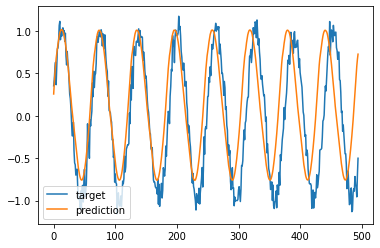

In [8]:
# Plot predicted vs actual output
plt.plot(y_test, label='target')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()